https://machinelearningmastery.com/adaboost-ensemble-in-python/

La biblioteca de aprendizaje automático de Python de scikit-learn proporciona una implementación de conjuntos AdaBoost para el aprendizaje automático.

Boosting se refiere a una clase de algoritmos de conjuntos de aprendizaje automático donde los modelos se agregan secuencialmente y los modelos posteriores en la secuencia corrigen las predicciones realizadas por los modelos anteriores en la secuencia.

AdaBoost combina las predicciones de árboles de decisión cortos de un nivel, llamados stumps de decisión, aunque también se pueden usar otros algoritmos.

Los algoritmos de stump de decisión se usan ya que el algoritmo AdaBoost busca usar muchos modelos débiles y corregir sus predicciones agregando modelos débiles adicionales.

El algoritmo de entrenamiento implica comenzar con un árbol de decisión, encontrar las muestras en el conjunto de datos de entrenamiento que se clasificaron incorrectamente y agregar más peso a esos ejemplos. Se entrena otro árbol con los mismos datos, aunque ahora ponderado por los errores de clasificación. Este proceso se repite hasta que se agrega el número deseado de árboles.

Si un punto de datos de entrenamiento se clasifica incorrectamente, el peso de ese punto de datos de entrenamiento aumenta (boosted). Se construye un segundo clasificador utilizando los nuevos pesos, que ya no son iguales. Nuevamente, los datos de entrenamiento mal clasificados tienen sus pesos reforzados y se repite el procedimiento.


In [13]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.2.2


AdaBoost se proporciona a través de las clases AdaBoostRegressor y AdaBoostClassifier.

Ambos modelos funcionan de la misma manera y toman los mismos argumentos que influyen en cómo se crean los árboles de decisión.

La aleatoriedad se utiliza en la construcción del modelo. Esto significa que cada vez que el algoritmo se ejecuta con los mismos datos, producirá un modelo ligeramente diferente.

Cuando se utilizan algoritmos de aprendizaje automático que tienen un algoritmo de aprendizaje estocástico, es una buena práctica evaluarlos promediando su rendimiento en múltiples ejecuciones o repeticiones de validación cruzada. Al ajustar un modelo final, puede ser deseable aumentar el número de árboles hasta que la varianza del modelo se reduzca a través de evaluaciones repetidas, o ajustar múltiples modelos finales y promediar sus predicciones.

Primero, podemos usar la función make_classification() para crear un problema de clasificación binaria sintética con 1000 muestras y 20 features de entrada.

**ADABOOST PARA CLASIFICACION**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Evaluaremos el modelo usando validación cruzada de k-fold estratificada repetida, con tres repeticiones y 10 folds. Informaremos la media y la desviación estándar de la precisión del modelo en todas las repeticiones y pliegues.

In [23]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

##########COMENTARIOS################################################################

# Importamos Pandas para extraer el dataset de Kaggle
import pandas as pd
# E importamos el train_test_split para dividir los datos en entrenamiento y para hacer predicciones después.
from sklearn.model_selection import train_test_split

# El dataset consiste en los datos recopilados para determinar si las mujeres tienen diabetes o no en la india.
# El conjunto de datos consiste en las pascientes mujeres de almenos 21 años.
# Las características que se extrajeron son:
# Pregnancy (Cantidad de veces embarazada), Glucose (Glucosa), BloodPressure (Presión en la sangre), SkinThickness (Profundidad de la piel en el trícep),
# Insulin (Insulina), BMI (Índice de masa corporal), DiabetesPedigreeFunction (Dunción del pedigrí de la diabetes), Age (Edad), Outcome (si está enferma o no).

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practicando/PIMA INDIANS DIABETES.csv')
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
data.shape

(768, 9)

In [44]:
# Definimos las variables independientes y la variable independiente.
X = data.drop(columns='Outcome')
y = data[['Outcome']]
print(X.shape, y.shape)

(768, 8) (768, 1)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)
print(X_train.shape, y_train.shape)

(614, 8) (614, 1)


In [46]:

# define the model
model = AdaBoostClassifier()
# n_repeats Indica la cantidad de veces que se repetirá la validación cruzada con diferentes divisiones aleatorias del conjunto de datos.
# La elección de pliegues en la validación cruzada implica cierto grado de aleatoriedad. Al realizar más repeticiones, se reduce el
# impacto de esta aleatoriedad, ya que se promedian los resultados a lo largo de múltiples divisiones de los datos.
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=5, random_state=19)
# scoring='accuracy' Especifica la métrica de rendimiento que deseamos medir durante la validación cruzada.
# error_score='raise': Especifica qué hacer si ocurre un error durante el ajuste del modelo en una de las divisiones de la validación cruzada.
# en este caso, si ocurre un error, se generará una excepción (raise).
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print(n_scores)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


[0.80769231 0.80769231 0.80769231 0.66666667 0.66666667 0.62745098
 0.80392157 0.68627451 0.68627451 0.78431373 0.74509804 0.70588235
 0.70588235 0.90196078 0.8627451  0.76923077 0.75       0.78846154
 0.76470588 0.78431373 0.70588235 0.74509804 0.70588235 0.68627451
 0.7254902  0.74509804 0.78431373 0.76470588 0.7254902  0.68627451
 0.73076923 0.76923077 0.71153846 0.7254902  0.84313725 0.78431373
 0.64705882 0.76470588 0.74509804 0.80392157 0.7254902  0.78431373
 0.68627451 0.76470588 0.7254902  0.80769231 0.80769231 0.80769231
 0.76470588 0.78431373 0.76470588 0.70588235 0.78431373 0.76470588
 0.68627451 0.7254902  0.7254902  0.70588235 0.80392157 0.78431373
 0.61538462 0.82692308 0.69230769 0.70588235 0.78431373 0.66666667
 0.64705882 0.82352941 0.60784314 0.68627451 0.74509804 0.7254902
 0.82352941 0.88235294 0.84313725]
Accuracy: 0.748 (0.061)


In [47]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
693,7,129,68,49,125,38.5,0.439,43
624,2,108,64,0,0,30.8,0.158,21
711,5,126,78,27,22,29.6,0.439,40
485,0,135,68,42,250,42.3,0.365,24
717,10,94,72,18,0,23.1,0.595,56


In [48]:
y_test.head()

,Outcome
693,1
624,0
711,0
485,1
717,0


**Nota:** Nuestros resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Consideremos ejecutar el ejemplo varias veces y comparemos el resultado promedio.

En este caso, podemos ver que el conjunto AdaBoost con hiperparámetros predeterminados logra una precisión de clasificación de alrededor del 80 por ciento en este conjunto de datos de prueba.

También podemos usar el modelo AdaBoost como modelo final y hacer predicciones para la clasificación.

Primero, el conjunto AdaBoost se ajusta a todos los datos disponibles, luego se puede llamar a la función predict() para hacer predicciones sobre nuevos datos.

El siguiente ejemplo demuestra esto en nuestro conjunto de datos de clasificación binaria.

In [53]:
# make predictions using adaboost for classification

from sklearn.ensemble import AdaBoostClassifier

# define the model
model = AdaBoostClassifier()
#########Entrenamos el modelo con nuestros datos###########
model.fit(X_train, y_train)
# make a single prediction
row = [[0, 135,	68,	42,	250, 42.3, 0.365,	24]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


**ADABOOST PARA REGRESION:**

A continuación, podemos evaluar un algoritmo AdaBoost en este conjunto de datos.

Como hicimos en la última sección, evaluaremos el modelo usando validación cruzada repetida de k-fold, con tres repeticiones y 10 pliegues. Informaremos el error absoluto medio (MAE) del modelo en todas las repeticiones y folds. La biblioteca scikit-learn hace que el MAE sea negativo para que se maximice en lugar de minimizarse. Esto significa que los MAE negativos más grandes son mejores y un modelo perfecto tiene un MAE de 0.

In [54]:
# evaluate adaboost ensemble for regression
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor
#########Cargamos la data de nuestro dataset###########
(X, y) = (X_train, y_train)
# define el model
model = AdaBoostRegressor()
# Evaluar el modelo
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# En scikit-learn, las métricas de evaluación están diseñadas para ser maximizadas, lo que significa que un valor más alto
# de la métrica indica un mejor rendimiento del modelo. Por ejemplo, en el caso del coeficiente de determinación R2,
# un valor más cercano a 1 indica un mejor ajuste del modelo.
#  algunas métricas, como el error absoluto medio (MAE), son naturalmente métricas que se deben minimizar.
# Un MAE más bajo indica un mejor rendimiento del modelo, ya que significa que las predicciones del modelo están más cerca de los valores reales.
# Para adaptar estas métricas al marco de maximización de scikit-learn, se utiliza el enfoque de negación. Al tomar la métrica MAE y negarla,
# se convierte en una métrica que se maximiza cuando el valor absoluto del error es menor, es decir, cuando el MAE es menor.
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# reporta performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print(X_train.shape, y.shape)

MAE: -0.374 (0.026)
(614, 8) (614, 1)


**Nota:** Nuestros resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Consideremos ejecutar el ejemplo varias veces y comparemos el resultado promedio.

En este caso, podemos ver que el conjunto AdaBoost con hiperparámetros predeterminados logra un MAE de aproximadamente 72.

También podemos usar el modelo AdaBoost como modelo final y hacer predicciones para la regresión.

Primero, el conjunto AdaBoost se ajusta a todos los datos disponibles, luego se puede llamar a la función predict() para hacer predicciones sobre nuevos datos.

In [56]:
# adaboost ensemble for making predictions for regression

from sklearn.ensemble import AdaBoostRegressor


# define the model
model = AdaBoostRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[0, 135,	68,	42,	250, 42.3, 0.365,	24]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


**AdaBoost Hyperparameters:**

En esta sección, analizaremos más de cerca algunos de los hiperparámetros que debe considerar ajustar para el conjunto AdaBoost y su efecto en el rendimiento del modelo.

**Explorar número de árboles:**

Un hiperparámetro importante para el algoritmo AdaBoost es la cantidad de árboles de decisión utilizados en el conjunto.

Recuerde que cada árbol de decisión utilizado en el conjunto está diseñado para ser un aprendiz débil.

Cada árbol de decisión individual, o "stump", es considerado un aprendiz débil. Esto significa que tiene una habilidad ligeramente mejor que la predicción aleatoria, pero no es muy efectivo por sí solo.

La cantidad de árboles agregados al modelo debe ser alta para que el modelo funcione bien, a menudo cientos, si no miles.

El número de árboles se puede establecer a través del argumento "n_estimators" y el valor predeterminado es 50.

El siguiente ejemplo explora el efecto del número de árboles con valores entre 10 y 5000.


Scores [0.75806452 0.79032258 0.69354839 0.74193548 0.80327869 0.72131148
 0.62295082 0.63934426 0.85245902 0.81967213 0.67741935 0.77419355
 0.74193548 0.62903226 0.6557377  0.70491803 0.80327869 0.83606557
 0.70491803 0.7704918  0.70967742 0.70967742 0.66129032 0.77419355
 0.70491803 0.83606557 0.7704918  0.73770492 0.72131148 0.72131148]
Name 20
>20 0.736 (0.062)
Scores [0.69354839 0.75806452 0.74193548 0.79032258 0.70491803 0.7704918
 0.67213115 0.68852459 0.75409836 0.80327869 0.72580645 0.77419355
 0.79032258 0.61290323 0.6557377  0.70491803 0.7704918  0.8852459
 0.70491803 0.70491803 0.64516129 0.67741935 0.67741935 0.72580645
 0.68852459 0.83606557 0.73770492 0.73770492 0.72131148 0.73770492]
Name 75
>75 0.730 (0.057)
Scores [0.70967742 0.77419355 0.74193548 0.74193548 0.67213115 0.75409836
 0.67213115 0.68852459 0.73770492 0.78688525 0.70967742 0.77419355
 0.72580645 0.62903226 0.6557377  0.67213115 0.75409836 0.86885246
 0.68852459 0.70491803 0.66129032 0.66129032 0.72580645 

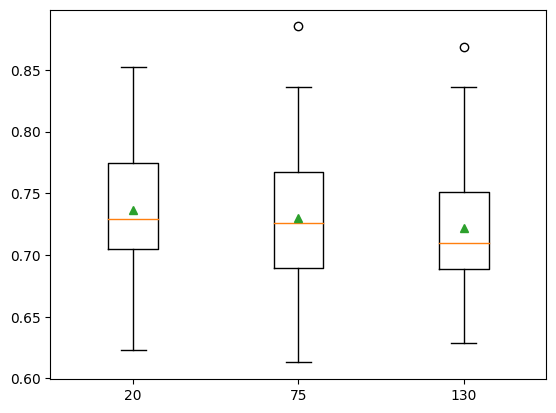

In [59]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

#########Cargamos la data de nuestro dataset###########
def get_dataset():
	(X, y) = (X_train, y_train)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	#########Probamos otras cantidades de árboles###########
	n_trees = [20, 75, 130]#, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('Scores', scores)
	print('Name', name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


**Nota:** Nuestros resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Consideremos ejecutar el ejemplo varias veces y comparemos el resultado promedio.

En este caso, podemos ver que ese rendimiento mejora en este conjunto de datos hasta unos 50 árboles y luego disminuye. Esto podría ser una señal de que el conjunto sobreajustó el conjunto de datos de entrenamiento después de agregar árboles adicionales.

Se crea un diagrama de caja y bigotes para la distribución de puntuaciones de precisión para cada número configurado de árboles.

Podemos ver la tendencia general del rendimiento del modelo y el tamaño del conjunto.

**Explorando weak learners:**

Un árbol de decisión con un nivel se usa como aprendiz débil de forma predeterminada.

Podemos hacer que los modelos utilizados en el conjunto sean menos débiles (más hábiles) aumentando la profundidad del árbol de decisión.

El siguiente ejemplo explora el efecto de aumentar la profundidad del alumno débil de DecisionTreeClassifier en el conjunto de AdBoost.

>1 0.733 (0.050)
>2 0.701 (0.052)
>3 0.692 (0.061)
>4 0.715 (0.052)
>5 0.736 (0.055)
>6 0.736 (0.053)
>7 0.730 (0.061)
>8 0.735 (0.060)
>9 0.735 (0.048)
>10 0.734 (0.058)
>11 0.711 (0.062)
>12 0.689 (0.047)
>13 0.703 (0.059)
>14 0.693 (0.043)
>15 0.686 (0.046)


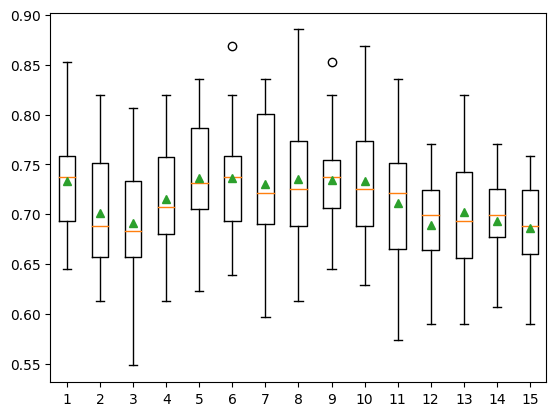

In [60]:
# explore adaboost ensemble tree depth effect on performance
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	(X, y) = (X_train, y_train)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	###########Exploramos de 1 a 15########
	for i in range(1,16):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

**Notamos que:**

Del 5 al 10 se obtienen los mejores valores, inclusive en el 1.

---



**Nota:**

Nuestros resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Consideremos ejecutar el ejemplo varias veces y comparemos el resultado promedio.

En este caso, podemos ver que a medida que aumenta la profundidad de los árboles de decisión, también aumenta el rendimiento del conjunto en este conjunto de datos.

Se crea un gráfico de caja y bigotes para la distribución de puntuaciones de precisión para cada profundidad de aprendizaje débil configurada.

Podemos ver la tendencia general del rendimiento del modelo y la poca profundidad de aprendizaje.

**Explorandoo learning rate:**

AdaBoost también admite una tasa de aprendizaje que controla la contribución de cada modelo a la predicción del conjunto.

Esto está controlado por el argumento “learning_rate” y por defecto está establecido en 1.0 o contribución completa. Los valores más pequeños o más grandes pueden ser apropiados según el número de modelos utilizados en el conjunto. Hay un equilibrio entre la contribución de los modelos y el número de árboles en el conjunto.

Más árboles pueden requerir una tasa de aprendizaje menor; menos árboles pueden requerir una mayor tasa de aprendizaje. Es común utilizar valores entre 0 y 1 ya veces valores muy pequeños para evitar sobreajustes como 0,1, 0,01 o 0,001.

El siguiente ejemplo explora los valores de la tasa de aprendizaje entre 0,1 y 2,0 en incrementos de 0,1.

>0.100 0.754 (0.056)
>0.200 0.748 (0.063)
>0.300 0.743 (0.061)
>0.400 0.745 (0.061)
>0.500 0.745 (0.051)
>0.600 0.741 (0.055)
>0.700 0.737 (0.053)
>0.800 0.741 (0.053)
>0.900 0.737 (0.051)
>1.000 0.733 (0.050)
>1.100 0.723 (0.054)
>1.200 0.729 (0.054)
>1.300 0.723 (0.067)
>1.400 0.716 (0.060)
>1.500 0.728 (0.060)
>1.600 0.736 (0.053)
>1.700 0.733 (0.055)
>1.800 0.719 (0.061)
>1.900 0.720 (0.057)
>2.000 0.421 (0.177)
>2.100 0.301 (0.085)
>2.200 0.714 (0.054)
>2.300 0.705 (0.082)
>2.400 0.714 (0.054)
>2.500 0.714 (0.054)


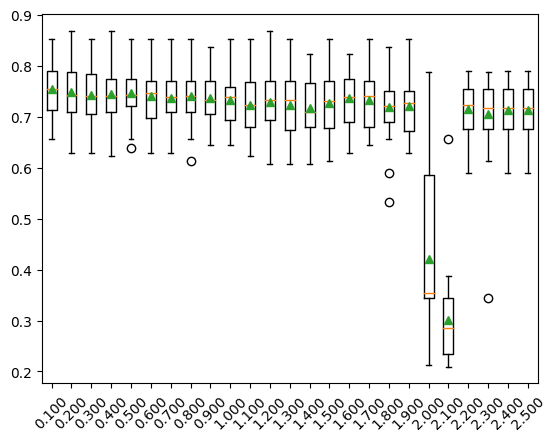

(614, 8) (614, 1)


In [61]:
# explore adaboost ensemble learning rate effect on performance
from numpy import mean
from numpy import std
from numpy import arange

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	(X, y) = (X_train, y_train)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore learning rates from 0.1 to 2.5 in 0.1 increments
	for i in arange(0.1, 2.6, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()
print(X.shape, y.shape)

**Notamos que:**

Los resultados previos al 2.0 son bastante aceptables.

---



**Nota:**

Nuestros resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Consideremos ejecutar el ejemplo varias veces y comparemos el resultado promedio.

En este caso, podemos ver valores similares entre 0,5 y 1,0 y una disminución en el rendimiento del modelo después de eso.

Se crea un gráfico de caja y bigotes para la distribución de puntuaciones de precisión para cada tasa de aprendizaje configurada.

Podemos ver la tendencia general de disminución del rendimiento del modelo con una tasa de aprendizaje superior a 1,0 en este conjunto de datos.

**Explorando algoritmo alternativo:**

El algoritmo predeterminado utilizado en el conjunto es un árbol de decisión, aunque se pueden utilizar otros algoritmos.

La intención es utilizar modelos muy simples, llamados aprendices débiles. Además, la implementación de scikit-learn requiere que todos los modelos utilizados también admitan muestras ponderadas, ya que son la forma en que se crea el conjunto ajustando modelos basados ​en una versión ponderada del conjunto de datos de entrenamiento.

El modelo base se puede especificar a través del argumento "base_estimator". El modelo base también debe soportar la predicción de probabilidades o puntajes similares a la probabilidad en el caso de la clasificación. Si el modelo especificado no admite un conjunto de datos de entrenamiento ponderado, verá un mensaje de error como el siguiente:

ValueError: KNeighborsClassifier no admite sample_weight.

En AdaBoost, el algoritmo asigna pesos iniciales iguales a todas las muestras. Luego, en cada iteración, ajusta los pesos para dar más importancia a las muestras que fueron clasificadas incorrectamente por los modelos anteriores. Esta asignación de pesos permite que el modelo se centre más en las muestras difíciles de clasificar, mejorando así su rendimiento general.

Un ejemplo de un modelo que admite un entrenamiento ponderado es el algoritmo de regresión logística.

El siguiente ejemplo muestra un algoritmo AdaBoost con un aprendiz débil LogisticRegression.

In [63]:
# evaluate adaboost algorithm with logistic regression weak learner for classification
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#########Cargamos la data de nuestro dataset###########
(X, y) = (X_train, y_train)
# define the model
#model = AdaBoostClassifier(base_estimator=KNeighborsClassifier())
model = AdaBoostClassifier(base_estimator=LogisticRegression())
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=4, random_state=19)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.768 (0.061)


**Notamos que:**

Se obtuvo unos bajos resultados, de una regresión logística de aproximadamente 77% de precisión.

---





**Nota:** Nuestros resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Consideremos ejecutar el ejemplo varias veces y comparemos el resultado promedio.

En este caso, podemos ver que el conjunto AdaBoost con un modelo débil de regresión logística logra una precisión de clasificación de alrededor del 79 por ciento en este conjunto de datos de prueba.

**Hiperparámetros de AdaBoost de búsqueda en grid:**

AdaBoost puede ser un desafío para configurar como el algoritmo, ya que muchos hiperparámetros clave que influyen en el comportamiento del modelo en los datos de entrenamiento y los hiperparámetros interactúan entre sí.

Como tal, es una buena práctica usar un proceso de búsqueda para descubrir una configuración de los hiperparámetros del modelo que funcione bien o mejor para un problema de modelado predictivo determinado. Los procesos de búsqueda populares incluyen una búsqueda aleatoria y una búsqueda en grid.

En esta sección, veremos el grid de búsqueda de rangos comunes para los hiperparámetros clave para el algoritmo AdaBoost que puede usar como punto de partida para sus propios proyectos. Esto se puede lograr utilizando la clase GridSearchCV y especificando un diccionario que asigna los nombres de los hiperparámetros del modelo a los valores de búsqueda.

En lugar de ajustar manualmente los hiperparámetros, GridSearchCV realiza una búsqueda sistemática a través de una "cuadrícula" de posibles combinaciones de valores de hiperparámetros. Evalúa el rendimiento del modelo para cada combinación utilizando validación cruzada y encuentra la configuración que proporciona el mejor rendimiento.

Por lo tanto, GridSearchCV ayuda a automatizar el proceso de selección de hiperparámetros y permite encontrar la mejor configuración para un modelo en particular, lo que puede resultar en un modelo más preciso y generalizable.

En este caso, buscaremos en el grid dos hiperparámetros clave para AdaBoost: la cantidad de árboles utilizados en el conjunto y la tasa de aprendizaje. Usaremos un rango de valores populares de buen desempeño para cada hiperparámetro.

Cada combinación de configuración se evaluará mediante la validación cruzada repetida de k-fold y las configuraciones se compararán mediante la puntuación media, en este caso, la precisión de la clasificación.

El ejemplo completo de búsqueda en grid de los hiperparámetros clave del algoritmo AdaBoost en nuestro conjunto de datos de clasificación sintética se enumera a continuación.

In [64]:
# example of grid searching key hyperparameters for adaboost on a classification dataset

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

#########Cargamos la data de nuestro dataset###########
(X, y) = (X_train, y_train)
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.753587 using {'learning_rate': 0.1, 'n_estimators': 50}
0.716023 (0.054566) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.716023 (0.054566) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.718209 (0.052049) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.719848 (0.053896) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.716023 (0.054566) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.719848 (0.053896) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.722581 (0.049118) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.736735 (0.051465) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.722581 (0.049118) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.737811 (0.049327) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.738384 (0.049588) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.753570 (0.054060) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.740005 (0.047698) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.753587 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Notamos que:**

Al ejecutar este algoritmo alternativo, los valores más altos que obtenemos continúan siendo débiles, cerca al orden del 75%.


---


Ejecutar el ejemplo puede tomar un tiempo dependiendo de su hardware. Al final de la ejecución, se informa primero la configuración que logró la mejor puntuación, seguida de las puntuaciones de todas las demás configuraciones que se consideraron.

**Nota:** Nuestros resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Consideremos ejecutar el ejemplo varias veces y comparemos el resultado promedio.

En este caso, podemos ver que una configuración con 500 árboles y una tasa de aprendizaje de 0,1 se desempeñó mejor con una precisión de clasificación de alrededor del 81,3 por ciento.

El modelo puede funcionar incluso mejor con más árboles, como 1000 o 5000, aunque estas configuraciones no se probaron en este caso para garantizar que la búsqueda de grid se complete en un tiempo razonable.

**RandomizedSearchCV** selecciona aleatoriamente un subconjunto de combinaciones de hiperparámetros para evaluar, lo que puede ser más eficiente en términos de tiempo y recursos.

In [65]:
# example of grid searching key hyperparameters for adaboost on a classification dataset

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import AdaBoostClassifier

#########Cargamos la data de nuestro dataset###########
(X, y) = (X_train, y_train)

# define the model with default hyperparameters
model = AdaBoostClassifier()

# Define la cuadrícula de parámetros (ajústala según tus necesidades)
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 2.0),#######Modificamos para que vaya hasta 2.0########
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': randint(1, 100)
}

# define the grid of values to search
#grid = dict()
#grid['n_estimators'] = [10, 50, 100, 500]
#grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Número de combinaciones aleatorias a probar
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

# execute the grid search
grid_result = random_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.750890 using {'algorithm': 'SAMME', 'learning_rate': 0.12867814210137207, 'n_estimators': 99, 'random_state': 43}
0.720439 (0.057157) with: {'algorithm': 'SAMME.R', 'learning_rate': 1.5890658627073417, 'n_estimators': 136, 'random_state': 40}
0.750890 (0.059380) with: {'algorithm': 'SAMME', 'learning_rate': 0.12867814210137207, 'n_estimators': 99, 'random_state': 43}
0.743354 (0.062142) with: {'algorithm': 'SAMME', 'learning_rate': 0.4497588528640528, 'n_estimators': 143, 'random_state': 77}
0.719884 (0.056450) with: {'algorithm': 'SAMME.R', 'learning_rate': 1.4322551990293675, 'n_estimators': 85, 'random_state': 93}
0.732434 (0.051434) with: {'algorithm': 'SAMME.R', 'learning_rate': 0.6290794903154733, 'n_estimators': 118, 'random_state': 62}
0.734629 (0.058006) with: {'algorithm': 'SAMME', 'learning_rate': 1.3399811299107351, 'n_estimators': 177, 'random_state': 1}
0.736251 (0.058269) with: {'algorithm': 'SAMME', 'learning_rate': 0.9851818678929989, 'n_estimators': 176, 'rand

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
